# Check Dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import os
from os import listdir
from os.path import isfile, join

In [9]:
os.environ['IMAGES_FOLDER']
#print(os.environ)

'/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_sample'

In [10]:
image_dir = os.environ['IMAGES_FOLDER']

#image_files = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

image_files = []
for f in listdir(image_dir):
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []
y_list = []

for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)

not jpg ignored
not jpg ignored
(1370, 128, 128, 3)
(1370,)


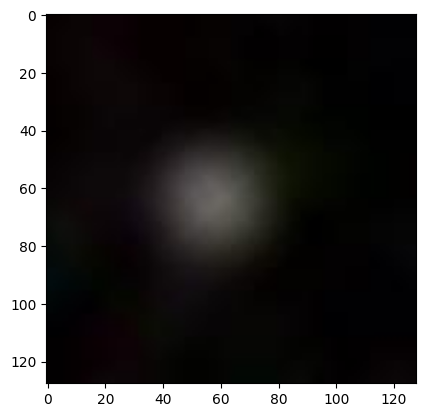

In [30]:
plt.imshow(X_data[3]) #/ use this tomorrow

In [40]:
#y.value_counts()/len(y)

1    0.691241
0    0.308759
Name: count, dtype: float64

In [11]:
import pandas as pd
y_data_cat = pd.Series(y_data).map({'STAR':0, 'GALAXY':1})
y_data_cat


0       0
1       1
2       1
3       0
4       1
       ..
1365    0
1366    1
1367    0
1368    0
1369    0
Length: 1370, dtype: int64

In [12]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

#df = pd.read_csv('/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data')
X = X_data
y = y_data_cat

y_cat = to_categorical(y, num_classes=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y_cat,
                                                    test_size=0.2,
                                                    random_state=42)


In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1096, 128, 128, 3), (274, 128, 128, 3), (1096, 2), (274, 2))

# The Convolutional Neural Network

### A. Architecture and compilation of a CNN

In [31]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(2, activation='softmax')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │       576,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 595,424 (2.27 MB)

 Trainable params: 595,424 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','recall','precision','mae','mse'])


### B. Training the CNN

In [34]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5501 - loss: 14.7921 - mae: 0.4557 - mse: 0.2821 - precision: 0.5501 - recall: 0.5501 - val_accuracy: 0.6818 - val_loss: 0.6833 - val_mae: 0.4949 - val_mse: 0.2451 - val_precision: 0.6818 - val_recall: 0.6818
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7047 - loss: 0.8237 - mae: 0.4879 - mse: 0.2443 - precision: 0.7047 - recall: 0.7047 - val_accuracy: 0.6818 - val_loss: 0.6700 - val_mae: 0.4872 - val_mse: 0.2384 - val_precision: 0.6818 - val_recall: 0.6818
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7062 - loss: 0.6634 - mae: 0.4835 - mse: 0.2352 - precision: 0.7062 - recall: 0.7062 - val_accuracy: 0.6818 - val_loss: 0.6596 - val_mae: 0.4804 - val_mse: 0.2333 - val_precision: 0.6818 - val_recall: 0.6818
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6783 - loss: 0.6582 - mae: 0.4793 - mse: 0.2326 - precision: 0.6783 - recall: 0.6783 - val_accuracy: 0.6818 - v

### C. Evaluate model's performance

In [35]:
# Evaluate the model
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6850 - loss: 0.6230 - mae: 0.4312 - mse: 0.2158 - precision: 0.6850 - recall: 0.6850


[0.6079152226448059,
 0.7043795585632324,
 0.7043795585632324,
 0.7043795585632324,
 0.42404115200042725,
 0.2085731476545334]